Extract a set of points from a halo catalog to use as a LSS sample.

In [1]:
from abacusnbody.data.compaso_halo_catalog import CompaSOHaloCatalog

cat = CompaSOHaloCatalog(
    "/mnt/home/lgarrison/ceph/AbacusSummit/AbacusSummit_base_c000_ph000/halos/z0.100/",
    cleaned=False,
    fields=["N", "x_L2com"],
)

/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/sw/nix/store/71ksmx7k6xy3v9ksfkv5mp5kxxp64pd6-python-3.10.13-view/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <

In [77]:
import Corrfunc
import numpy as np

rng = np.random.default_rng(123)

bins = np.linspace(0., 150, 20)
L = cat.header["BoxSize"]
pos = cat.halos["x_L2com"].copy()
N = cat.halos["N"]
pos = pos[N >= 50_000]
print(len(pos))
pos = rng.choice(pos, 10_000, replace=False)
pos %= L

res = Corrfunc.theory.xi(
    L,
    1,
    bins,
    *pos.T,
    verbose=True,
)

135431


In gridlink_float> Running with [nmesh_x, nmesh_y, nmesh_z]  = 26,26,13.  Time taken =   0.001 sec
0%.........10%.........20%.........30%.........40%.........50%.........60%.........70%.........80%.........90%.........100% done. Time taken =  0.015 secs


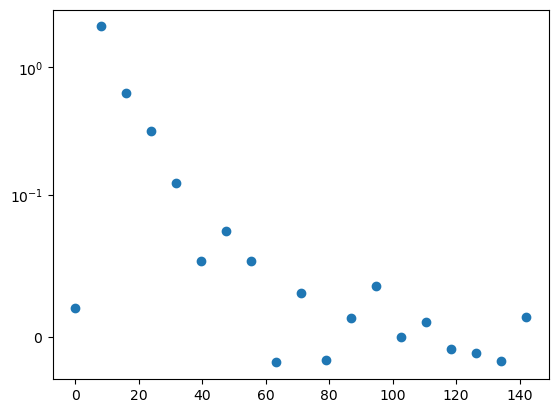

In [78]:
# plot
import matplotlib.pyplot as plt

plt.plot(bins[:-1], res["xi"], marker="o", ls="none")
# plt.xscale('log')
plt.yscale("symlog", linthresh=0.1)
plt.show()

In [58]:
pos.T

1002.2712 .. 1000.7808
1022.61536 .. 982.41003
251.77208 .. 457.94385


In [67]:
import astropy.io.ascii
from astropy.table import Table

t = Table(pos, names=["x", "y", "z"], meta=dict(L=L))

astropy.io.ascii.write(
    t, "galaxies.ecsv", format="ecsv",  overwrite=True,
)